## Data Exploration

### Assembling Dataset

In [844]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [724]:
flowers_df = pd.read_csv("data/main_tables/flowers.csv")
plants_df = pd.read_csv("data/main_tables/plants.csv")
plant_measurements_df = pd.read_csv("data/main_tables/plant_measurements.csv")
flower_counts_df = pd.read_csv("data/main_tables/flower_counts.csv")
temp_summary_wide_df = pd.read_csv("data/main_tables/temperature_summary_wide.csv")

In [725]:
flower_counts_mean = (
    flower_counts_df[["Plant", "Num_flowers"]].groupby(by="Plant").mean()
)
flowers_mean = (
    flowers_df[["Plant", "Nectar_pH", "Bacterial_CFU_per_uL", "Fungal_CFU_per_uL"]]
    .groupby(by="Plant")
    .mean()
)
plant_measurements_mean = (
    plant_measurements_df[
        [
            "Plant",
            "Jan_PAR_mol_m2_day",
            "Feb_PAR_mol_m2_day",
            "Mar_PAR_mol_m2_day",
            "Apr_PAR_mol_m2_day",
            "May_PAR_mol_m2_day",
            "Jun_PAR_mol_m2_day",
            "Jul_PAR_mol_m2_day",
            "Aug_PAR_mol_m2_day",
            "Sep_PAR_mol_m2_day",
            "Oct_PAR_mol_m2_day",
            "Nov_PAR_mol_m2_day",
            "Dec_PAR_mol_m2_day",
            "deltaC13",
            "Volume_m3",
            "Height_m",
        ]
    ]
    .groupby(by="Plant")
    .mean()
)
temps_mean = temp_summary_wide_df.drop(columns="Year").groupby(by="Plant").mean()

In [726]:
from functools import reduce

plant_summary_df = reduce(
    lambda left, right: pd.merge(left, right, on="Plant", how="inner"),
    [flower_counts_mean, flowers_mean, plant_measurements_mean, temps_mean],
)

Split into train/test before filling NA values

In [727]:
from sklearn.model_selection import train_test_split

In [728]:
y = plant_summary_df["Num_flowers"].values

In [729]:
plant_summary_df.shape

(79, 75)

In [730]:
plant_summary_features = plant_summary_df.reset_index().drop(
    columns=["Plant", "Num_flowers"]
)
plant_summary_features.head()

,Nectar_pH,Bacterial_CFU_per_uL,Fungal_CFU_per_uL,Jan_PAR_mol_m2_day,Feb_PAR_mol_m2_day,Mar_PAR_mol_m2_day,Apr_PAR_mol_m2_day,May_PAR_mol_m2_day,Jun_PAR_mol_m2_day,Jul_PAR_mol_m2_day,...,May_Temp_daily_mean,May_Temp_daily_min,May_Temp_daily_range,Week8_Temp_daily_min,Week8_Temp_daily_max,Week8_Temp_daily_range,Week8_Temp_daily_mean,Jan_Temp_daily_range,Feb_Temp_daily_range,Mar_Temp_daily_range
0,4.812500,49.097143,2.552381,15.21000,22.64000,39.06000,46.440,50.01000,55.50000,54.11000,...,15.676146,8.158861,18.343196,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5.035294,204.713367,294.117647,5.14875,10.19250,21.52500,37.030,53.55125,61.50500,60.62375,...,15.232217,9.025755,15.308888,8.548250,16.819000,8.27075,10.818354,NaN,NaN,15.723167
2,4.656250,116.453941,0.236364,7.51625,18.61375,32.13125,46.995,60.87750,67.34875,66.96750,...,16.219819,9.630927,16.177236,10.221125,17.296125,7.07500,12.483644,NaN,NaN,13.649042
3,5.039773,224.754224,68.138889,8.98750,17.84000,34.64000,47.985,57.03000,63.37000,62.89500,...,17.009460,10.443402,16.057395,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.956522,271.368308,0.000000,17.77500,24.30000,38.03000,48.915,54.71750,58.12000,58.36250,...,16.659059,9.745790,16.421679,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [731]:
X_train, X_test, y_train, y_test = train_test_split(
    plant_summary_features,
    y,
    test_size=0.15,
    random_state=229,
)

In [732]:
X_train.shape, X_test.shape

((67, 74), (12, 74))

In [733]:
# impute mean within each split
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)

In [734]:
from sklearn.preprocessing import StandardScaler

In [735]:
# standardize measurements as they have different scales
std_scaler = StandardScaler()
X_train_std = std_scaler.fit_transform(X_train)
X_test_std = std_scaler.fit_transform(X_test)

### Data Exploration and Visualization

#### PCA

In [897]:
from sklearn.decomposition import PCA

In [898]:
pca_all = PCA()
all_components_pca = pca_all.fit_transform(X_train)
two_components_pca = all_components_pca[:, :2]

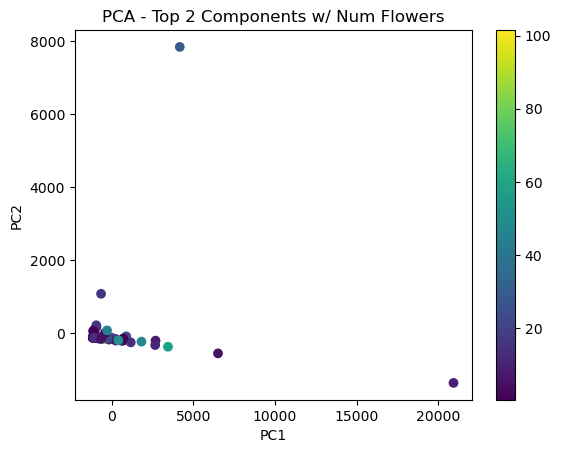

In [899]:
plt.scatter(two_components_pca[:, 0], two_components_pca[:, 1], c=y_train)
plt.colorbar()
plt.title("PCA - Top 2 Components w/ Num Flowers")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

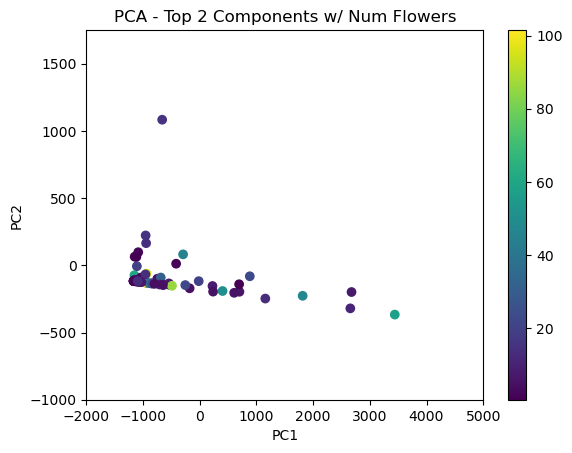

In [900]:
plt.scatter(two_components_pca[:, 0], two_components_pca[:, 1], c=y_train)
plt.colorbar()
plt.title("PCA - Top 2 Components w/ Num Flowers")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.axis([-2000, 5000, -1000, 1750])
plt.show()

In [901]:
top_features = np.abs(pca_all.components_[:2]).argsort(axis=1)[:, ::-1][:, :5]
top_features

array([[ 1,  2, 17, 11,  5],
       [ 2,  1,  8,  9,  7]])

In [902]:
plant_summary_features.columns.to_numpy()[top_features]

array([['Bacterial_CFU_per_uL', 'Fungal_CFU_per_uL', 'Height_m',
        'Sep_PAR_mol_m2_day', 'Mar_PAR_mol_m2_day'],
       ['Fungal_CFU_per_uL', 'Bacterial_CFU_per_uL',
        'Jun_PAR_mol_m2_day', 'Jul_PAR_mol_m2_day', 'May_PAR_mol_m2_day']],
      dtype=object)

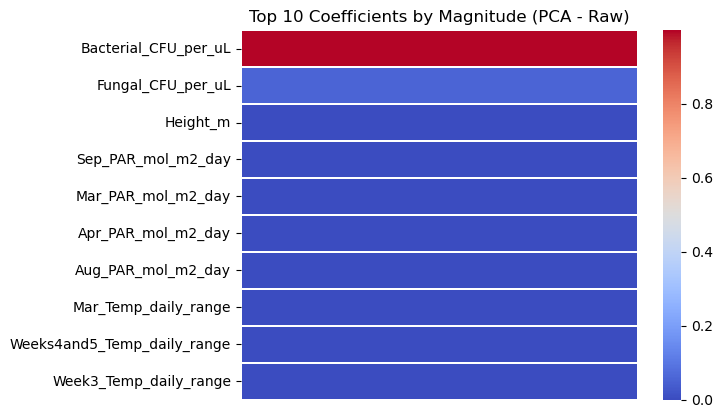

In [906]:
coef = pca_all.components_[0]
top10_indices = np.argsort(np.abs(coef))[::-1][:10]
top10_coef = coef[top10_indices]
sns.heatmap(
    top10_coef.reshape((-1, 1)),
    cmap="coolwarm",
    yticklabels=plant_summary_features.columns[top10_indices],
    xticklabels=[],
    linewidths=0.1,
)
plt.title("Top 10 Coefficients by Magnitude (PCA - Raw)")
plt.show()

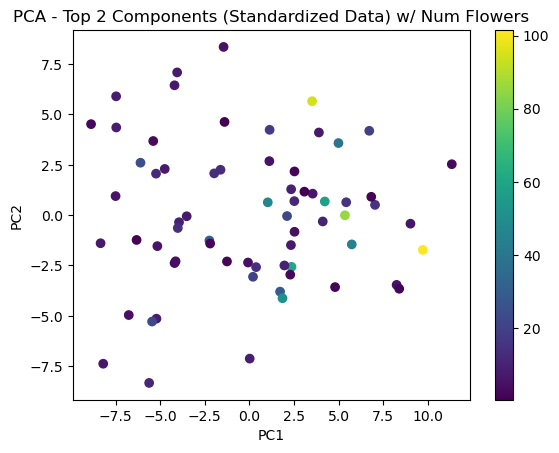

In [907]:
pca_std = pca_all.fit_transform(X_train_std)
plt.scatter(pca_std[:, 0], pca_std[:, 1], c=y_train)
plt.colorbar()
plt.title("PCA - Top 2 Components (Standardized Data) w/ Num Flowers")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

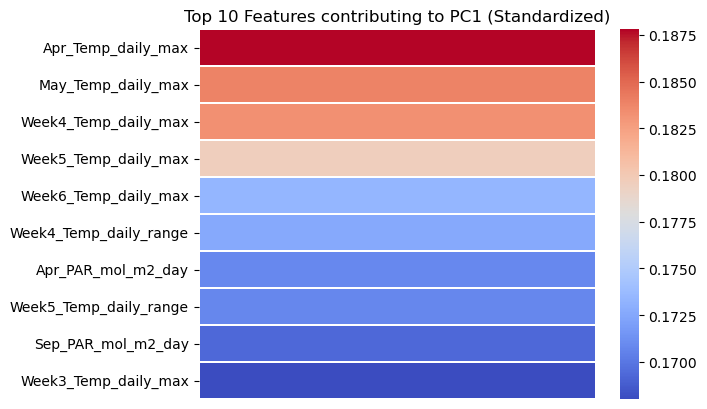

In [938]:
coef = pca_all.components_[0]
top10_indices = np.argsort(np.abs(coef))[::-1][:10]
top10_coef = coef[top10_indices]
sns.heatmap(
    top10_coef.reshape((-1, 1)),
    cmap="coolwarm",
    yticklabels=plant_summary_features.columns[top10_indices],
    xticklabels=[],
    linewidths=0.1,
)
plt.title("Top 10 Features contributing to PC1 (Standardized)")
plt.show()

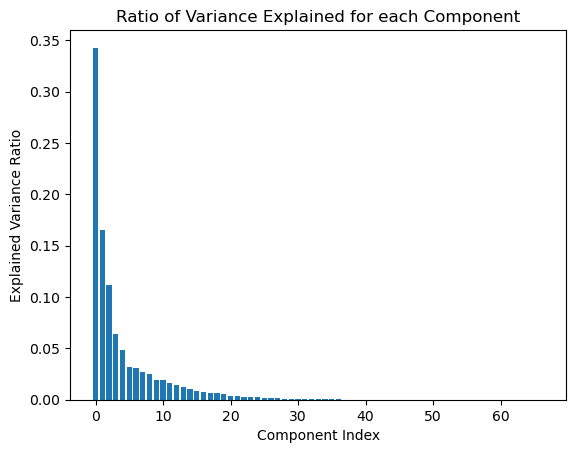

In [909]:
plt.bar(range(pca_all.n_components_), pca_all.explained_variance_ratio_)
plt.title("Ratio of Variance Explained for each Component")
plt.ylabel("Explained Variance Ratio")
plt.xlabel("Component Index")
plt.show()

In [910]:
np.sum(pca_all.explained_variance_ratio_[:12])

0.9026089448635212

The maximum number of components is $\min(\text{n\_features}, \text{n\_examples})$, which is 12 for our test set. This still captures 90% of the explained variance.

In [745]:
X_train_pca = pca_std[:, :12]
X_test_pca = pca_all.fit_transform(X_test_std)[:, :12]

#### tSNE

In [746]:
from sklearn.manifold import TSNE

In [892]:
min_kl_perp_emb = None
min_kl = 1e10
for p in range(5, 51):
    tsne = TSNE(perplexity=p)
    tsne_embedding = tsne.fit_transform(X_train_std)
    if tsne.kl_divergence_ < min_kl:
        min_kl_perp_emb = (p, tsne_embedding)
min_kl_perp_emb[0]

50

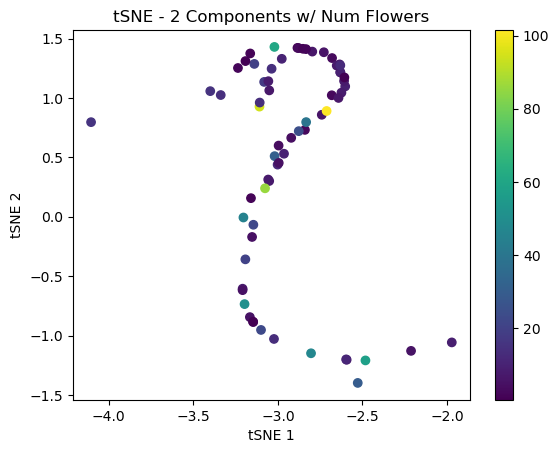

In [748]:
tsne_embedding = TSNE(perplexity=50).fit_transform(X_train)
plt.scatter(tsne_embedding[:, 0], tsne_embedding[:, 1], c=y_train)
plt.colorbar()
plt.title("tSNE - 2 Components w/ Num Flowers")
plt.xlabel("tSNE 1")
plt.ylabel("tSNE 2")
plt.show()

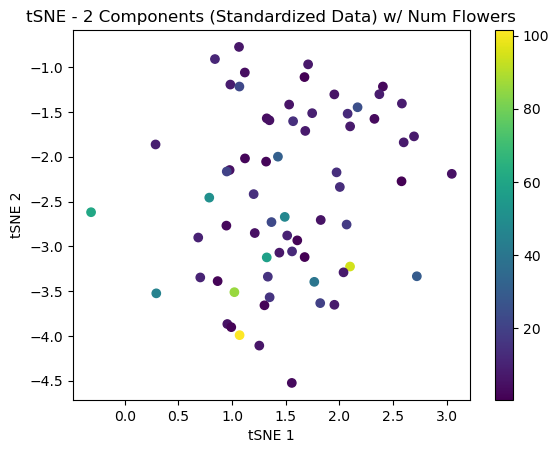

In [749]:
tsne_std_embedding = TSNE(perplexity=50).fit_transform(X_train_std)
plt.scatter(tsne_std_embedding[:, 0], tsne_std_embedding[:, 1], c=y_train)
plt.colorbar()
plt.title("tSNE - 2 Components (Standardized Data) w/ Num Flowers")
plt.xlabel("tSNE 1")
plt.ylabel("tSNE 2")
plt.show()

### Fitting Models

#### Setting up K-Fold Cross Validation

Best for small datasets like this

In [750]:
from sklearn.model_selection import KFold

In [751]:
k = 5  # Number of splits
kfold = KFold(n_splits=k, shuffle=True, random_state=229)
l2_alphas = np.logspace(-6, 6, 25)


#### Ridge Regression (L2 penalty)

In [752]:
from sklearn.kernel_ridge import KernelRidge
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

In [753]:
reg = linear_model.RidgeCV(
    alphas=l2_alphas,
    cv=kfold,
    scoring="neg_mean_squared_error",
)
reg.fit(X_train_std, y_train)

RidgeCV(alphas=array([1.00000000e-06, 3.16227766e-06, 1.00000000e-05, 3.16227766e-05,
       1.00000000e-04, 3.16227766e-04, 1.00000000e-03, 3.16227766e-03,
       1.00000000e-02, 3.16227766e-02, 1.00000000e-01, 3.16227766e-01,
       1.00000000e+00, 3.16227766e+00, 1.00000000e+01, 3.16227766e+01,
       1.00000000e+02, 3.16227766e+02, 1.00000000e+03, 3.16227766e+03,
       1.00000000e+04, 3.16227766e+04, 1.00000000e+05, 3.16227766e+05,
       1.00000000e+06]),
        cv=KFold(n_splits=5, random_state=229, shuffle=True),
        scoring='neg_mean_squared_error')

In [754]:
reg.alpha_

10000.0

In [755]:
y_train_preds = reg.predict(X_train_std)
mean_squared_error(y_train, y_train_preds), r2_score(y_train, y_train_preds)

(451.0732048303517, 0.036452268957816614)

In [756]:
y_test_preds = reg.predict(X_test_std)
mean_squared_error(y_test, y_test_preds), r2_score(y_test, y_test_preds)

(757.0966970639497, -0.10517427025124348)

Now, let's try with PCA embeddings

In [757]:
reg.fit(X_train_pca, y_train)

RidgeCV(alphas=array([1.00000000e-06, 3.16227766e-06, 1.00000000e-05, 3.16227766e-05,
       1.00000000e-04, 3.16227766e-04, 1.00000000e-03, 3.16227766e-03,
       1.00000000e-02, 3.16227766e-02, 1.00000000e-01, 3.16227766e-01,
       1.00000000e+00, 3.16227766e+00, 1.00000000e+01, 3.16227766e+01,
       1.00000000e+02, 3.16227766e+02, 1.00000000e+03, 3.16227766e+03,
       1.00000000e+04, 3.16227766e+04, 1.00000000e+05, 3.16227766e+05,
       1.00000000e+06]),
        cv=KFold(n_splits=5, random_state=229, shuffle=True),
        scoring='neg_mean_squared_error')

In [758]:
reg.alpha_

10000.0

In [759]:
y_train_preds = reg.predict(X_train_pca)
mean_squared_error(y_train, y_train_preds), r2_score(y_train, y_train_preds)

(451.77414656991203, 0.034954971367284426)

In [760]:
y_test_preds = reg.predict(X_test_pca)
mean_squared_error(y_test, y_test_preds), r2_score(y_test, y_test_preds)

(780.1083211882477, -0.1387655605018716)

PCA embeddings did worse

#### Kernel Ridge Regression

In [845]:
kridge_reg = KernelRidge()
kridge_gridsearch = GridSearchCV(
    kridge_reg,
    param_grid={
        "alpha": l2_alphas,
        "kernel": ["linear", "poly", "rbf", "sigmoid"],
    },
    cv=kfold,
    scoring="neg_mean_squared_error",
    n_jobs=-1,
    verbose=1,
)

In [ ]:
kridge_gridsearch.fit(X_train_std, y_train)

In [847]:
kridge_gridsearch.best_params_

{'alpha': 3.162277660168379, 'kernel': 'sigmoid'}

In [848]:
y_train_preds = kridge_gridsearch.predict(X_train_std)
mean_squared_error(y_train, y_train_preds), r2_score(y_train, y_train_preds)

(444.28314349876774, 0.0509566733862411)

In [849]:
y_test_preds = kridge_gridsearch.predict(X_test_std)
mean_squared_error(y_test, y_test_preds), r2_score(y_test, y_test_preds)

(668.8471369510728, 0.023648300994901783)

In [ ]:
kridge_gridsearch.fit(X_train_pca, y_train)

In [888]:
kridge_gridsearch.best_params_

{'alpha': 31.622776601683796, 'kernel': 'sigmoid'}

In [889]:
y_train_preds = kridge_gridsearch.predict(X_train_pca)
mean_squared_error(y_train, y_train_preds), r2_score(y_train, y_train_preds)

(569.3786909527091, -0.21626277042456632)

In [890]:
y_test_preds = kridge_gridsearch.predict(X_test_pca)
mean_squared_error(y_test, y_test_preds), r2_score(y_test, y_test_preds)

(1070.0205646709003, -0.5619658642020184)

#### Poisson Regression

In [769]:
from sklearn.linear_model import PoissonRegressor

In [770]:
poisson_reg = PoissonRegressor()
poisson_gridsearch = GridSearchCV(
    poisson_reg,
    param_grid={"alpha": l2_alphas},
    cv=kfold,
    scoring="neg_mean_squared_error",
)

In [ ]:
poisson_gridsearch.fit(X_train_std, y_train)

In [772]:
poisson_gridsearch.best_params_

{'alpha': 3162.277660168379}

In [773]:
y_train_preds = poisson_gridsearch.predict(X_train_std)
mean_squared_error(y_train, y_train_preds), r2_score(y_train, y_train_preds)

(454.13375853234214, 0.029914550592579747)

In [774]:
y_test_preds = poisson_gridsearch.predict(X_test_std)
mean_squared_error(y_test, y_test_preds), r2_score(y_test, y_test_preds)

(760.339031903758, -0.10990727866931183)

In [775]:
poisson_gridsearch.fit(X_train_pca, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=229, shuffle=True),
             estimator=PoissonRegressor(),
             param_grid={'alpha': array([1.00000000e-06, 3.16227766e-06, 1.00000000e-05, 3.16227766e-05,
       1.00000000e-04, 3.16227766e-04, 1.00000000e-03, 3.16227766e-03,
       1.00000000e-02, 3.16227766e-02, 1.00000000e-01, 3.16227766e-01,
       1.00000000e+00, 3.16227766e+00, 1.00000000e+01, 3.16227766e+01,
       1.00000000e+02, 3.16227766e+02, 1.00000000e+03, 3.16227766e+03,
       1.00000000e+04, 3.16227766e+04, 1.00000000e+05, 3.16227766e+05,
       1.00000000e+06])},
             scoring='neg_mean_squared_error')

In [776]:
poisson_gridsearch.best_params_

{'alpha': 3162.277660168379}

In [777]:
y_train_preds = poisson_gridsearch.predict(X_train_pca)
mean_squared_error(y_train, y_train_preds), r2_score(y_train, y_train_preds)

(454.7107984349079, 0.028681922533798976)

In [778]:
y_test_preds = poisson_gridsearch.predict(X_test_pca)
mean_squared_error(y_test, y_test_preds), r2_score(y_test, y_test_preds)

(778.9629016670478, -0.1370935307751766)

#### Random Forest Regressor

In [779]:
from sklearn.ensemble import RandomForestRegressor

From sklearn [User Guide](https://scikit-learn.org/stable/modules/ensemble.html#forest:~:text=Empirical%20good%20default%20values%20are%20max_features%3D1.0%20or%20equivalently%20max_features%3DNone%20(always%20considering%20all%20features%20instead%20of%20a%20random%20subset)%20for%20regression%20problems): The main parameters to adjust when using these methods are `n_estimators` and `max_features`. Empirical good default values are `max_features=1.0` or equivalently `max_features=None` (always considering all features instead of a random subset) for regression problems

In [780]:
rf_reg = RandomForestRegressor(random_state=229)
n_estimators_to_try = np.linspace(10, 200, 5).astype(int)
n_estimators_to_try[2] = 100
rf_gridsearch = GridSearchCV(
    rf_reg,
    param_grid={
        "n_estimators": [100],
        "max_features": [0.325],  # these two performed well holding all else at default
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4],
        "max_depth": [None, 5, 10, 20],
        "max_leaf_nodes": [None, 25, 50, 100],
        "min_impurity_decrease": [0.0, 0.1, 0.2],
        "criterion": ["poisson", "squared_error"],
    },
    cv=kfold,
    scoring="neg_mean_squared_error",
    n_jobs=-1,
    verbose=1,
)

In [839]:
rf_gridsearch.fit(X_train_std, y_train)

Fitting 5 folds for each of 864 candidates, totalling 4320 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=229, shuffle=True),
             estimator=RandomForestRegressor(random_state=229), n_jobs=-1,
             param_grid={'criterion': ['poisson', 'squared_error'],
                         'max_depth': [None, 5, 10, 20],
                         'max_features': [0.325],
                         'max_leaf_nodes': [None, 25, 50, 100],
                         'min_impurity_decrease': [0.0, 0.1, 0.2],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100]},
             scoring='neg_mean_squared_error', verbose=1)

In [840]:
rf_gridsearch.best_params_

{'criterion': 'poisson',
 'max_depth': 5,
 'max_features': 0.325,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 100}

In [841]:
y_train_preds = rf_gridsearch.predict(X_train_std)
mean_squared_error(y_train, y_train_preds), r2_score(y_train, y_train_preds)

(120.22325538257248, 0.7431883700874)

In [842]:
y_test_preds = rf_gridsearch.predict(X_test_std)
mean_squared_error(y_test, y_test_preds), r2_score(y_test, y_test_preds)

(814.4414305866189, -0.18888342427270777)

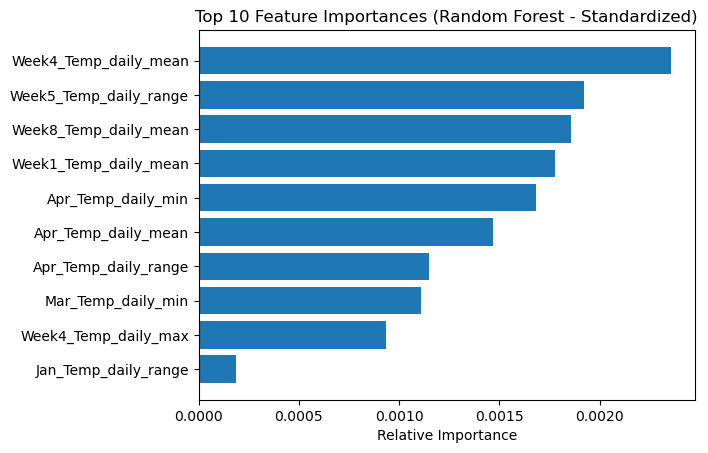

In [843]:
importances = rf_gridsearch.best_estimator_.feature_importances_
indices = np.argsort(importances)[:10]
plt.title("Top 10 Feature Importances (Random Forest - Standardized)")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [plant_summary_features.columns[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [785]:
rf_gridsearch.fit(X_train_pca, y_train)

Fitting 5 folds for each of 864 candidates, totalling 4320 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=229, shuffle=True),
             estimator=RandomForestRegressor(random_state=229), n_jobs=-1,
             param_grid={'criterion': ['poisson', 'squared_error'],
                         'max_depth': [None, 5, 10, 20],
                         'max_features': [0.325],
                         'max_leaf_nodes': [None, 25, 50, 100],
                         'min_impurity_decrease': [0.0, 0.1, 0.2],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100]},
             scoring='neg_mean_squared_error', verbose=1)

In [786]:
rf_gridsearch.best_params_

{'criterion': 'squared_error',
 'max_depth': 5,
 'max_features': 0.325,
 'max_leaf_nodes': 25,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 100}

In [787]:
y_train_preds = rf_gridsearch.predict(X_train_pca)
mean_squared_error(y_train, y_train_preds), r2_score(y_train, y_train_preds)

(269.89970198757464, 0.42346110858680275)

In [788]:
y_test_preds = rf_gridsearch.predict(X_test_pca)
mean_squared_error(y_test, y_test_preds), r2_score(y_test, y_test_preds)

(766.9962243781174, -0.11962513619438675)

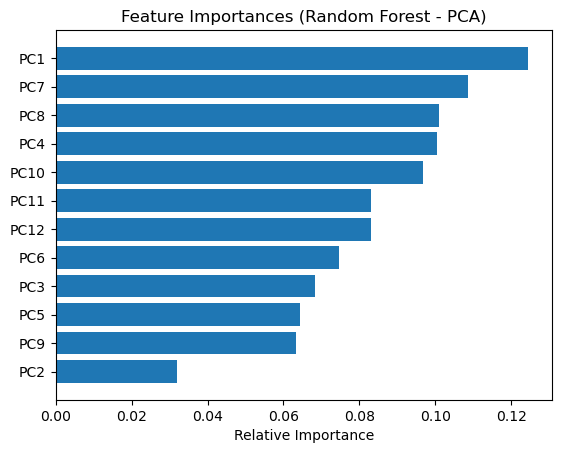

In [830]:
importances = rf_gridsearch.best_estimator_.feature_importances_
indices = np.argsort(importances)
plt.title("Feature Importances (Random Forest - PCA)")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [f"PC{i+1}" for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#### SVM

In [789]:
from sklearn.svm import SVR

In [790]:
svr = SVR()
svr_gridsearch = GridSearchCV(
    svr,
    param_grid={
        "C": np.logspace(-1, 3, 5),  # roughly 1 / alpha
        "epsilon": [5, 10, 20, 40],
        "kernel": ["linear", "poly", "rbf", "sigmoid"],
    },
    cv=kfold,
    scoring="neg_mean_squared_error",
    n_jobs=-1,
    verbose=1,
)

In [832]:
svr_gridsearch.fit(X_train_std, y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=229, shuffle=True),
             estimator=SVR(), n_jobs=-1,
             param_grid={'C': array([1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'epsilon': [5, 10, 20, 40],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='neg_mean_squared_error', verbose=1)

In [833]:
svr_gridsearch.best_params_

{'C': 10.0, 'epsilon': 10, 'kernel': 'sigmoid'}

In [834]:
y_train_preds = svr_gridsearch.predict(X_train_std)
mean_squared_error(y_train, y_train_preds), r2_score(y_train, y_train_preds)

(458.61286312239025, 0.020346633415001758)

In [835]:
y_test_preds = svr_gridsearch.predict(X_test_std)
mean_squared_error(y_test, y_test_preds), r2_score(y_test, y_test_preds)

(680.6416829343494, 0.006431175625628782)

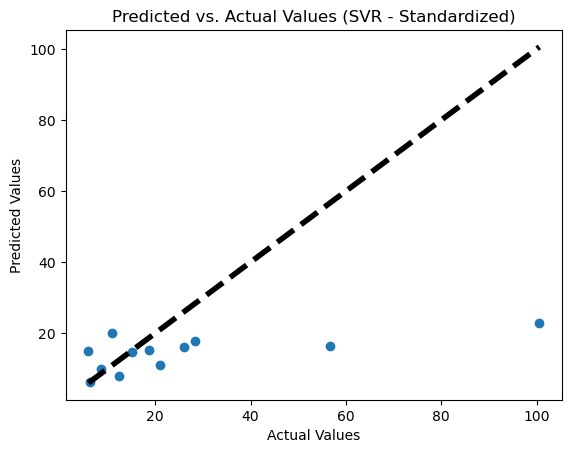

In [837]:
plt.scatter(y_test, y_test_preds)
plt.title("Predicted vs. Actual Values (SVR - Standardized)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "k--", lw=4)
plt.show()

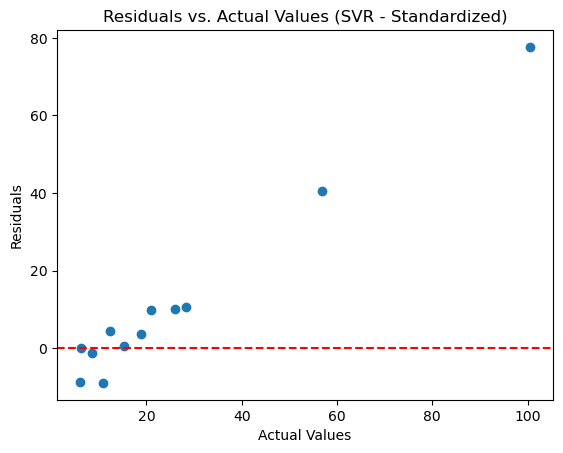

In [838]:
residuals = y_test - y_test_preds
plt.title("Residuals vs. Actual Values (SVR - Standardized)")
plt.scatter(y_test, residuals)
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.axhline(y=0, color="r", linestyle="--")
plt.show()

In [911]:
svr_gridsearch.fit(X_train_pca, y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=229, shuffle=True),
             estimator=SVR(), n_jobs=-1,
             param_grid={'C': array([1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'epsilon': [5, 10, 20, 40],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='neg_mean_squared_error', verbose=1)

In [912]:
svr_gridsearch.best_params_

{'C': 10.0, 'epsilon': 10, 'kernel': 'rbf'}

In [913]:
y_train_preds = svr_gridsearch.predict(X_train_pca)
mean_squared_error(y_train, y_train_preds), r2_score(y_train, y_train_preds)

(385.81074433806214, 0.17586089499940594)

In [914]:
y_test_preds = svr_gridsearch.predict(X_test_pca)
mean_squared_error(y_test, y_test_preds), r2_score(y_test, y_test_preds)

(791.0948382462257, -0.15480316312151166)

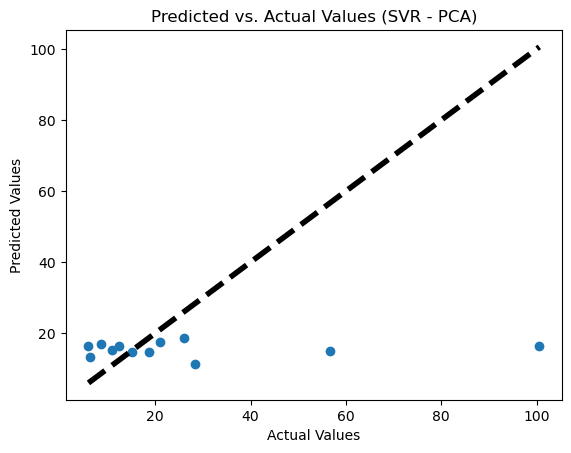

In [917]:
plt.scatter(y_test, y_test_preds)
plt.title("Predicted vs. Actual Values (SVR - PCA)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "k--", lw=4)
plt.show()

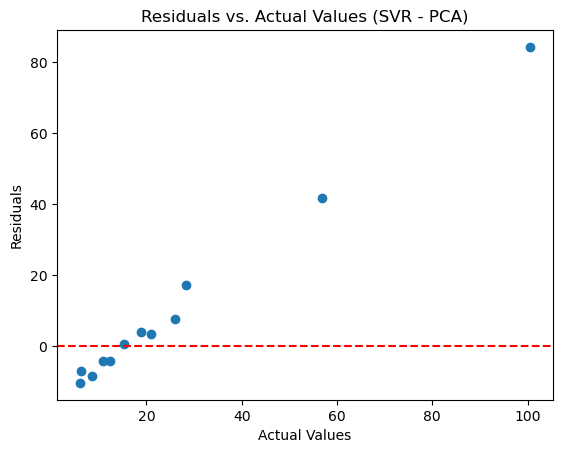

In [918]:
residuals = y_test - y_test_preds
plt.title("Residuals vs. Actual Values (SVR - PCA)")
plt.scatter(y_test, residuals)
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.axhline(y=0, color="r", linestyle="--")
plt.show()

#### Neural Network

In [822]:
import torch
import torch.nn as nn
import torch.optim as optim
import copy

In [823]:
torch_generator = torch.Generator().manual_seed(229)

In [824]:
class RegressionNet(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(RegressionNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, 1)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

In [933]:
from torch.utils.data import TensorDataset, DataLoader

# Convert to PyTorch tensors
X_tensor = torch.tensor(X_train_std, dtype=torch.float32)
y_tensor = torch.tensor(y_train, dtype=torch.float32)
train_dataset = TensorDataset(X_tensor, y_tensor)

In [826]:
num_epochs = 10000
patience = 10  # Number of epochs to wait for improvement before stopping
criterion = torch.nn.MSELoss()

In [804]:
batch_size = 1  # SGD
std_weight_decay = 1e-5

avg_train_loss = 0.0
avg_val_loss = 0.0

best_models = [None for _ in range(k)]

for fold, (train_ids, test_ids) in enumerate(kfold.split(X_tensor)):
    best_val_loss = float("inf")
    counter = 0

    # Define data loaders for training and testing data in this fold
    train_subsampler = torch.utils.data.SubsetRandomSampler(
        train_ids, generator=torch_generator
    )
    test_subsampler = torch.utils.data.SubsetRandomSampler(
        test_ids, generator=torch_generator
    )

    trainloader = DataLoader(
        train_dataset, batch_size=batch_size, sampler=train_subsampler
    )
    testloader = DataLoader(
        train_dataset, batch_size=batch_size, sampler=test_subsampler
    )

    # Init the neural network
    network = RegressionNet(input_size=X_tensor.shape[1], hidden_size=15)
    optimizer = torch.optim.Adam(
        network.parameters(), lr=1e-4, weight_decay=std_weight_decay
    )

    # Train this fold
    for epoch in range(num_epochs):
        network.train()
        total_loss = 0
        for inputs, targets in trainloader:
            optimizer.zero_grad()
            outputs = network(inputs)
            loss = criterion(outputs.squeeze(), targets.squeeze())
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        network.eval()
        total_val_loss = 0
        with torch.no_grad():
            for inputs, targets in testloader:
                outputs = network(inputs)
                loss = criterion(outputs.squeeze(), targets.squeeze())
                total_val_loss += loss.item()
        if total_val_loss < best_val_loss:
            best_val_loss = total_val_loss
            counter = 0
            best_models[fold] = copy.deepcopy(network.state_dict())
        else:
            counter += 1
            if counter >= patience:
                print(f"Stopping early at epoch {epoch+1} in fold {fold}")
                break
    avg_train_loss += total_loss / len(trainloader)

    # Evaluate for this fold
    network.eval()
    total_val_loss = 0
    with torch.no_grad():
        for inputs, targets in testloader:
            outputs = network(inputs)
            loss = criterion(outputs.squeeze(), targets.squeeze())
            total_val_loss += loss.item()
    avg_val_loss += total_val_loss / len(testloader)

    print(
        f"Fold {fold}, Train Loss: {total_loss / len(trainloader)}, Validation Loss: {total_val_loss / len(testloader)}"
    )

print(
    f"Average Train Loss: {avg_train_loss / k}, Average Validation Loss: {avg_val_loss / k}"
)

Stopping early at epoch 655 in fold 0
Fold 0, Train Loss: 236.6868988843459, Validation Loss: 262.41354092423404
Stopping early at epoch 141 in fold 1
Fold 1, Train Loss: 486.3796560118658, Validation Loss: 442.150058945907
Stopping early at epoch 385 in fold 2
Fold 2, Train Loss: 76.4621421142691, Validation Loss: 1641.4116101574439
Stopping early at epoch 124 in fold 3
Fold 3, Train Loss: 534.5692482654488, Validation Loss: 236.14606139493677
Stopping early at epoch 96 in fold 4
Fold 4, Train Loss: 628.8576762637606, Validation Loss: 72.76315465340248
Average Train Loss: 392.59112430793806, Average Validation Loss: 530.9768852151849


In [934]:
X_test_tensor = torch.tensor(X_test_std, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

In [935]:
# Retrain on whole dataset for test eval
median_epochs = 776

trainloader = DataLoader(
    train_dataset, batch_size=batch_size, shuffle=True, generator=torch_generator
)
testloader = DataLoader(
    test_dataset, batch_size=batch_size, shuffle=True, generator=torch_generator
)

# Init the neural network
network = RegressionNet(input_size=X_tensor.shape[1], hidden_size=15)
optimizer = torch.optim.Adam(
    network.parameters(), lr=1e-4, weight_decay=std_weight_decay
)

# Train over whole dataset
for epoch in range(median_epochs):
    network.train()
    total_loss = 0
    for inputs, targets in trainloader:
        optimizer.zero_grad()
        outputs = network(inputs)
        loss = criterion(outputs.squeeze(), targets.squeeze())
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

# Evaluate for  test set
network.eval()
total_test_loss = 0
with torch.no_grad():
    for inputs, targets in testloader:
        outputs = network(inputs)
        loss = criterion(outputs.squeeze(), targets.squeeze())
        total_test_loss += loss.item()

print(
    f"Train Loss: {total_loss / len(trainloader)}, Test Loss: {total_test_loss / len(testloader)}"
)

Train Loss: 127.14959872385815, Test Loss: 530.5887262870868


Train R^2: 0.7295881539163118
Test R^2: 0.22547158464491324


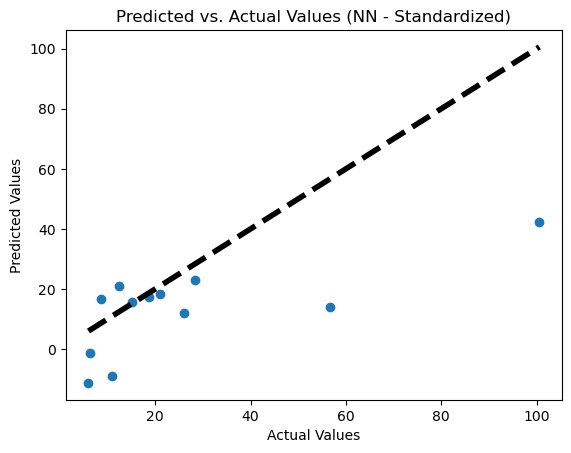

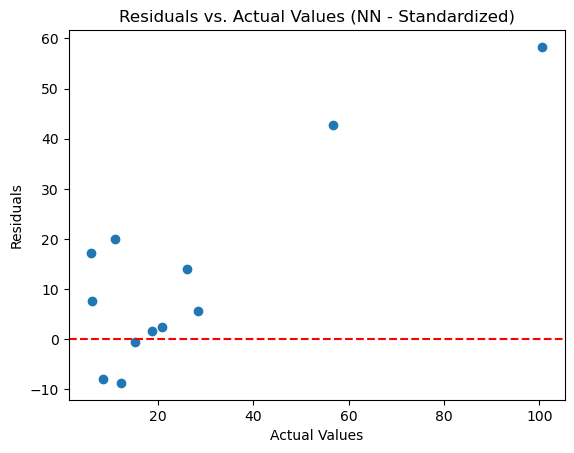

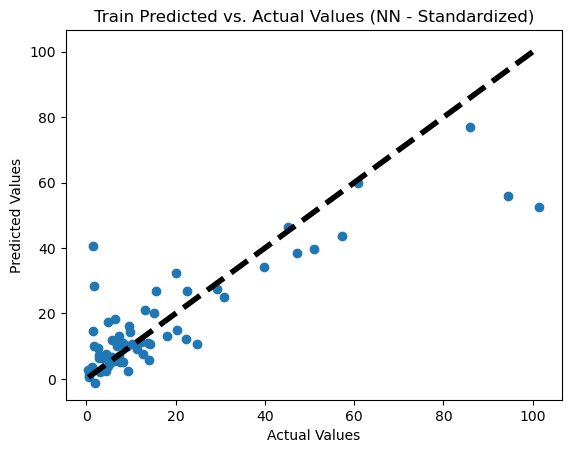

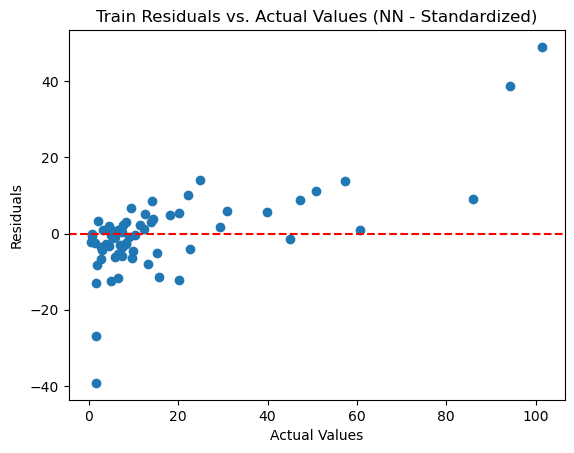

In [937]:
with torch.no_grad():
    y_train_preds = network(X_tensor).squeeze().numpy()
    y_test_preds = network(X_test_tensor).squeeze().numpy()
print("Train R^2:", r2_score(y_train, y_train_preds))
print("Test R^2:", r2_score(y_test, y_test_preds))
plt.scatter(y_test, y_test_preds)
plt.title("Predicted vs. Actual Values (NN - Standardized)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "k--", lw=4)
plt.show()
residuals = y_test - y_test_preds
plt.title("Residuals vs. Actual Values (NN - Standardized)")
plt.scatter(y_test, residuals)
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.axhline(y=0, color="r", linestyle="--")
plt.show()

plt.scatter(y_train, y_train_preds)
plt.title("Train Predicted vs. Actual Values (NN - Standardized)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], "k--", lw=4)
plt.show()
residuals = y_train - y_train_preds
plt.title("Train Residuals vs. Actual Values (NN - Standardized)")
plt.scatter(y_train, residuals)
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.axhline(y=0, color="r", linestyle="--")
plt.show()

In [925]:
X_tensor = torch.tensor(X_train_pca, dtype=torch.float32)
train_dataset = TensorDataset(X_tensor, y_tensor)

In [808]:
batch_size = 1  # SGD
pca_weight_decay = 2e-5

avg_train_loss = 0.0
avg_val_loss = 0.0

best_models = [None for _ in range(k)]

for fold, (train_ids, test_ids) in enumerate(kfold.split(X_tensor)):
    best_val_loss = float("inf")
    counter = 0

    # Define data loaders for training and testing data in this fold
    train_subsampler = torch.utils.data.SubsetRandomSampler(
        train_ids, generator=torch_generator
    )
    test_subsampler = torch.utils.data.SubsetRandomSampler(
        test_ids, generator=torch_generator
    )

    trainloader = DataLoader(
        train_dataset, batch_size=batch_size, sampler=train_subsampler
    )
    testloader = DataLoader(
        train_dataset, batch_size=batch_size, sampler=test_subsampler
    )

    # Init the neural network
    network = RegressionNet(input_size=X_tensor.shape[1], hidden_size=15)
    optimizer = torch.optim.Adam(
        network.parameters(), lr=1e-4, weight_decay=pca_weight_decay
    )

    # Train this fold
    for epoch in range(num_epochs):
        network.train()
        total_loss = 0
        for inputs, targets in trainloader:
            optimizer.zero_grad()
            outputs = network(inputs)
            loss = criterion(outputs.squeeze(), targets.squeeze())
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        network.eval()
        total_val_loss = 0
        with torch.no_grad():
            for inputs, targets in testloader:
                outputs = network(inputs)
                loss = criterion(outputs.squeeze(), targets.squeeze())
                total_val_loss += loss.item()
        if total_val_loss < best_val_loss:
            best_val_loss = total_val_loss
            counter = 0
            best_models[fold] = copy.deepcopy(network.state_dict())
        else:
            counter += 1
            if counter >= patience:
                print(f"Stopping early at epoch {epoch+1} in fold {fold}")
                break
    avg_train_loss += total_loss / len(trainloader)

    # Evaluate for this fold
    network.eval()
    total_val_loss = 0
    with torch.no_grad():
        for inputs, targets in testloader:
            outputs = network(inputs)
            loss = criterion(outputs.squeeze(), targets.squeeze())
            total_val_loss += loss.item()
    avg_val_loss += total_val_loss / len(testloader)

    print(
        f"Fold {fold}, Train Loss: {total_loss / len(trainloader)}, Validation Loss: {total_val_loss / len(testloader)}"
    )

print(
    f"Average Train Loss: {avg_train_loss / k}, Average Validation Loss: {avg_val_loss / k}"
)

Stopping early at epoch 996 in fold 0
Fold 0, Train Loss: 298.15833411126766, Validation Loss: 228.48399004380084
Stopping early at epoch 418 in fold 1
Fold 1, Train Loss: 366.67311865252987, Validation Loss: 332.88314687992846
Stopping early at epoch 491 in fold 2
Fold 2, Train Loss: 102.85515954869764, Validation Loss: 1564.8545471934171
Stopping early at epoch 376 in fold 3
Fold 3, Train Loss: 412.39639025356155, Validation Loss: 168.89624303120834
Stopping early at epoch 173 in fold 4
Fold 4, Train Loss: 618.1266550328966, Validation Loss: 63.39969267294957
Average Train Loss: 359.6419315197906, Average Validation Loss: 471.70352396426097


In [926]:
X_test_tensor = torch.tensor(X_test_pca, dtype=torch.float32)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

In [927]:
# Retrain on whole dataset for test eval
median_epochs = 386

trainloader = DataLoader(
    train_dataset, batch_size=batch_size, shuffle=True, generator=torch_generator
)
testloader = DataLoader(
    test_dataset, batch_size=batch_size, shuffle=True, generator=torch_generator
)

# Init the neural network
network = RegressionNet(input_size=X_tensor.shape[1], hidden_size=15)
optimizer = torch.optim.Adam(
    network.parameters(), lr=1e-4, weight_decay=pca_weight_decay
)

# Train over whole dataset
for epoch in range(median_epochs):
    network.train()
    total_loss = 0
    for inputs, targets in trainloader:
        optimizer.zero_grad()
        outputs = network(inputs)
        loss = criterion(outputs.squeeze(), targets.squeeze())
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

In [928]:
# Evaluate for  test set
network.eval()
total_test_loss = 0
with torch.no_grad():
    for inputs, targets in testloader:
        outputs = network(inputs)
        loss = criterion(outputs.squeeze(), targets.squeeze())
        total_test_loss += loss.item()

print(
    f"Train Loss: {total_loss / len(trainloader)}, Test Loss: {total_test_loss / len(testloader)}"
)

Train Loss: 316.96165574691713, Test Loss: 904.9980651537577


Train R^2: 0.3240072654441182
Test R^2: -0.32107371260163475


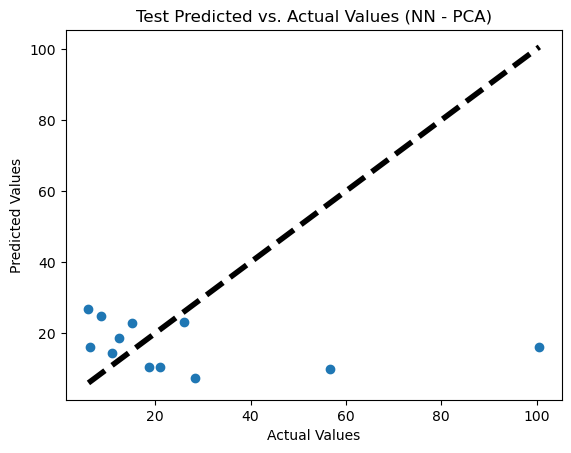

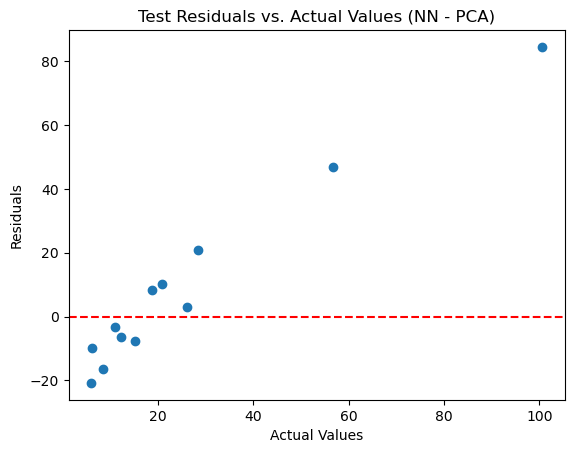

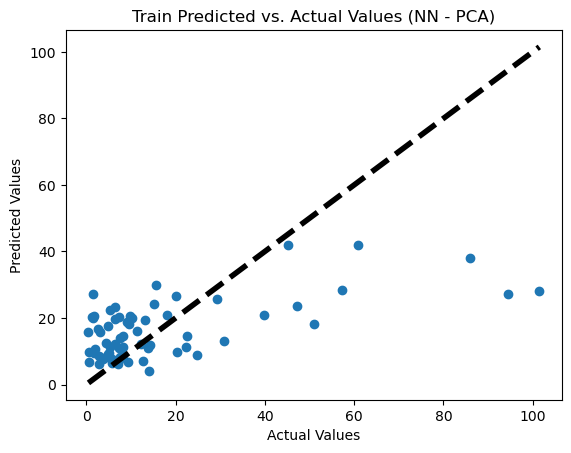

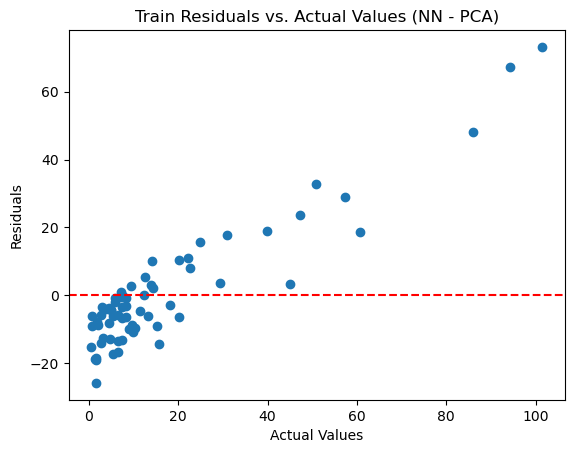

In [930]:
with torch.no_grad():
    y_train_preds = network(X_tensor).squeeze().numpy()
    y_test_preds = network(X_test_tensor).squeeze().numpy()
print("Train R^2:", r2_score(y_train, y_train_preds))
print("Test R^2:", r2_score(y_test, y_test_preds))
plt.scatter(y_test, y_test_preds)
plt.title("Test Predicted vs. Actual Values (NN - PCA)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "k--", lw=4)
plt.show()
residuals = y_test - y_test_preds
plt.title("Test Residuals vs. Actual Values (NN - PCA)")
plt.scatter(y_test, residuals)
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.axhline(y=0, color="r", linestyle="--")
plt.show()

plt.scatter(y_train, y_train_preds)
plt.title("Train Predicted vs. Actual Values (NN - PCA)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], "k--", lw=4)
plt.show()
residuals = y_train - y_train_preds
plt.title("Train Residuals vs. Actual Values (NN - PCA)")
plt.scatter(y_train, residuals)
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.axhline(y=0, color="r", linestyle="--")
plt.show()